http://preview.d2l.ai/d2l-en/master/chapter_computer-vision/image-augmentation.html
https://github.com/StevenJokes/Dive-into-DL-PyTorch/blob/master/docs/chapter09_computer-vision/9.1_image-augmentation.md


In [5]:
%matplotlib inline
from d2l import torch as d2l
from torch import nn
from PIL import Image
import torchvision


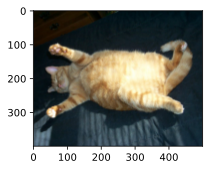

In [2]:
d2l.set_figsize()
img = Image.open('../img/cat1.jpg')
d2l.plt.imshow(img);

In [3]:
#@save
def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j])
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

In [4]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

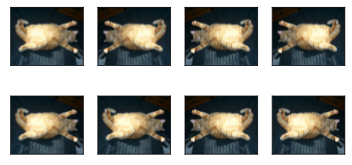

In [6]:
apply(img, torchvision.transforms.RandomHorizontalFlip())

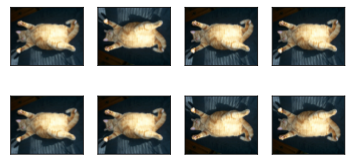

In [7]:
apply(img, torchvision.transforms.RandomVerticalFlip())

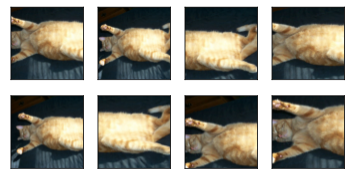

In [8]:
shape_aug = torchvision.transforms.RandomResizedCrop(
    200, scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

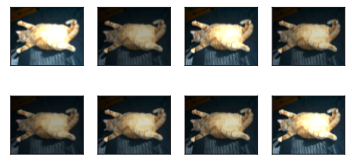

In [9]:
apply(img, torchvision.transforms.ColorJitter(brightness=0.5))

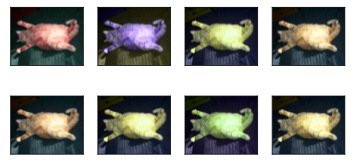

In [10]:
apply(img, torchvision.transforms.ColorJitter(hue=0.5))

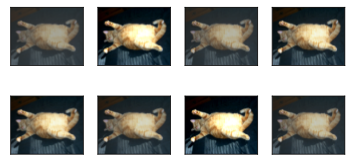

In [11]:
apply(img, torchvision.transforms.ColorJitter(contrast=0.5))

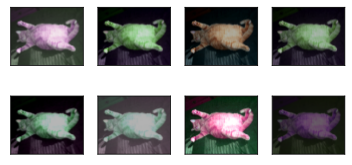

In [12]:
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

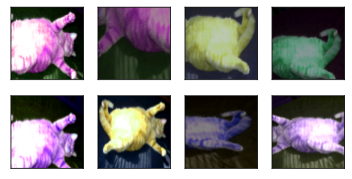

In [13]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)

In [ ]:
all_imges = torchvision.datasets.CIFAR10(train=True, root="~/Datasets/CIFAR", download=True)
# all_imges的每一个元素都是(image, label)
show_images([all_imges[i][0] for i in range(32)], 4, 8, scale=0.8);